-0.0
r2 =  -9.91502657489049e-11
slope =  1215727.2727272732
intercept =  -2211995974.025975
3900000


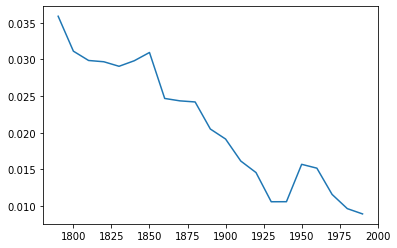

In [55]:
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.linear_model import LinearRegression
from sympy import *
import numpy as np
import math
from scipy import optimize
curyear=1790
N=21
years=[0]*N
population=[0]*N
for i in range (0, 21):
    years[i]=curyear
    curyear = curyear + 10
population[0]=3900000
population[1]=5300000
population[2]=7200000
population[3]=9600000
population[4]=12900000
population[5]=17100000
population[6]=23100000
population[7]=31400000
population[8]=38600000
population[9]=50200000
population[10]=62900000
population[11]=76000000
population[12]=92000000
population[13]=105700000
population[14]=122800000
population[15]=131700000
population[16]=150700000
population[17]=179000000
population[18]=205000000
population[19]=226500000
population[20]=248700000
#K1=200000000
#K2=250000000
#K3=300000000
xprime=[0]*N
XPRIMEoverX=[0]*N
xprime[0]=(population[1]-population[0])/10
xprime[20]=(population[20]-population[19])/10
for i in range (1, 20):
    xprime[i]=(population[i+1]-population[i-1])/20
    XPRIMEoverX[i]=xprime[i]/population[i]
XPRIMEoverX[0]=xprime[0]/population[0]
XPRIMEoverX[20]=xprime[20]/population[20]
b=0
ysum=0
xsum=0
xsquaresum=0
ytimesxsum=0
r=0
for i in range (N):
    xsum = xsum+population[i]
    ysum= ysum + years[i]
    xsquaresum = xsquaresum + population[i]**2
    ytimesxsum= ytimesxsum + population[i]*years[i]
#print(xsum, ysum, xsquaresum, ytimesxsum)
#r=(N*ytimesxsum - ysum*xsum)/(N*xsquaresum - xsum**2)
#b=(ysum - r*xsum)/N
#r,b=linear_least_square(np.asarray(population), np.asarray(XPRIMEoverX))
#K=-b/r
slope=-1*r*K
print(slope)
r2=diff_sum_numerator(population, XPRIMEoverX)/diff_sum_demon(population)

K=-b/r
slope=-1*r*K
#print(r)
#print(K)

print("r2 = ", r2)
################################################################
x=symbols('x')
K1 = 200*(10**6)
K2 = 250*(10**6)
K3 = 300*(10**6)
f1 = log(abs((K1-x)/x))
f2 = log(abs((K2-x)/x))
f3 = log(abs((K3-x)/x))

data_1 = [f1.subs(x, p).evalf(5) for p in population]
data_2 = [f2.subs(x, p).evalf(5) for p in population]
data_3 = [f3.subs(x, p).evalf(5) for p in population]
#print(data_1)
#data_2 = [f2.subs(x, p).evalf(5) for p in population]

#plt.plot(years, data_1, label='K=200000000')
#plt.close()
#plt.plot(years, data_2, label ='K=250000000' )
#plt.close()
#plt.plot(years, data_3, label = 'K=300000000')
#plt.close()
#plt.legend(loc= 'upper right')
#########################################################################
#plt.ylabel("Change in pop/population")
#plt.xlabel("population")
#plt.plot(population, XPRIMEoverX)
#################################################################
modeltwo=[0]*N
sline=[0]*N
r=r*1000000000
for i in range (N):
    modeltwo[i]=XPRIMEoverX[i]-r*(1-years[i]/K)
    sline[i]=population[i]
plt.plot(years, modeltwo)
#t = np.linspace(1790, 2000, 1000)
#plt.plot(t, r*t+K)
#plt.xlim(1790,2000)
#plt.ylim(3500000,300000000)
#print(xprime)
year2000pop=r*2000 + population[0]
#print(year2000pop)
t = np.array(years).reshape((-1, 1))
ft = np.array(population)
model=LinearRegression()
model.fit(t,ft)
r3=model.coef_[0]
print("slope = ", r3)
b2=model.intercept_
print("intercept = ", b2)
h = np.linspace(1790, 2000, 1000)
#year2000pop=r3*2000+b2
print(year2000pop)
#plt.plot(h, r3*h+b2)
#plt.xlim(1790,2000)
#plt.ylim(3500000,300000000)
###################################################################
#plt.plot(years[i],population[i])
#plt.xlim(1790, 2000)
#plt.show()
#########################################################
#x=np.linspace(1790, 1990, num=21)
#A = np.vstack([x, np.ones(len(x))]).T
#y = population[:, np.newaxis]
######################################################

In [37]:
def av(data):
    average = sum(data)/len(data)
    return average

def diff_sum_demon(data):
    adj_data = [(x - av(data))**2 for x in data]
    return sum(adj_data)

def diff_sum_numerator(data_x, data_y):
    adj_data_x = [(x - av(data_x)) for x in data_x]
    adj_data_y = [(y - av(data_y)) for y in data_y]
    
    adj_data_product = []
    product=0
    for i in range(0, len(data_x)):
        product = product + (data_x[i]-av(data_x))*(data_y[i]-av(years))
        adj_data_product.append(product)
    
    return product
    

In [47]:
def linear_least_square(x,y):
    m = len(x)
    xsq = sum(x**2)
    y_sum=(sum(y))
    xy=sum(x*y)
    a0=(xsq*y_sum - xy*sum(x))/(m*xsq - (sum(x)**2))
    a1=(m*xy - sum(x)*sum(y))/(m*xsq - (sum(x)**2))
    return a0, a1